# Importing necessary libraries

In [49]:
import time

import scipy.io as scio
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics.classification import cohen_kappa_score
from sklearn.metrics import accuracy_score

In [2]:
class Dataset:
    
    def __init__(self,name,form):
        
        self.name=name
        self.form=form
        
    def load(self):
        
        self.data_dict=scio.loadmat(self.name+self.form)
        self.data=self.data_dict[self.name]

# Designing input and output for training

In [3]:
bots=Dataset('Botswana','.mat')
bots.load()
data=bots.data
shp=np.shape(data)
row=shp[0]
col=shp[1]
bands=shp[2]
    
X=data.reshape(row*col,bands)
    
#Obtaining data in desired form
bots_gt=Dataset('Botswana_gt','.mat')
bots_gt.load()
y=bots_gt.data.reshape(row*col,1)
ind=np.where(y[:,0]!=0)
X=X[ind]
y = y[y!=0]

In [4]:
X

array([[6181, 6266, 6142, ...,  245,  201,  187],
       [6152, 6353, 6067, ...,  234,  210,  217],
       [6087, 6192, 6049, ...,  249,  202,  199],
       ..., 
       [4026, 3937, 3486, ...,   38,   35,   41],
       [3911, 3892, 3599, ...,   32,   32,   42],
       [3948, 4010, 3633, ...,   41,   44,   38]], dtype=uint16)

# Normalizing Data before PCA

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
sc = StandardScaler()  
X_n = sc.fit_transform(X)   

C:\Users\Ankit\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype uint16 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
X_n

array([[ 2.71488418,  2.85428226,  2.88614903, ...,  2.52353234,
         2.43382925,  2.02528128],
       [ 2.66614377,  2.99444218,  2.77214   , ...,  2.32515184,
         2.630252  ,  2.66216671],
       [ 2.55689802,  2.73506578,  2.74477783, ...,  2.5956707 ,
         2.455654  ,  2.28003545],
       ..., 
       [-0.90703261, -0.89781492, -1.15129095, ..., -1.20962799,
        -1.18907933, -1.0742278 ],
       [-1.10031355, -0.97031143, -0.97951733, ..., -1.31783553,
        -1.25455358, -1.05299829],
       [-1.03812751, -0.78020947, -0.92783324, ..., -1.15552422,
        -0.99265658, -1.13791634]])

# PCA

In [8]:
from sklearn.decomposition import PCA

pca = PCA()  
X_pc = pca.fit_transform(X_n)  

In [9]:
X_pc

array([[  2.74527441e+01,   2.25311214e+00,   3.19749276e+00, ...,
          2.38478536e-02,  -1.50450499e-02,  -1.71323470e-02],
       [  2.67699213e+01,   1.76436626e+00,   2.99523674e+00, ...,
          2.70681871e-02,  -1.69806376e-02,  -1.26478443e-02],
       [  2.69483129e+01,   2.30051067e+00,   2.06476884e+00, ...,
          2.67804176e-02,  -1.89933625e-02,  -4.59663747e-03],
       ..., 
       [ -1.01007022e+01,  -5.03347407e+00,  -1.51200114e-01, ...,
         -3.12690207e-02,   9.96774387e-03,  -1.51067738e-02],
       [ -1.17561743e+01,  -2.05725011e+00,  -1.66759821e-01, ...,
         -2.34641281e-02,  -1.80067760e-02,  -1.19715578e-04],
       [ -1.12492323e+01,  -2.53888576e+00,  -6.49691494e-02, ...,
          1.65790474e-02,   2.08288358e-02,   2.59977707e-02]])

In [10]:
explained_variance = pca.explained_variance_ratio_  

In [11]:
%matplotlib inline

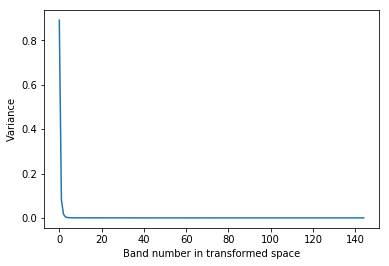

In [12]:
plt.plot(range(145),explained_variance)
plt.xlabel("Band number in transformed space")
plt.ylabel("Variance")
plt.show()

## So we chose value of n_components as 3 based on the plot

In [13]:
np.shape(X_pc)

(3248, 145)

In [14]:
np.shape(X_pc[:, 0:3])

(3248, 3)

In [15]:
X_pc[:, 0:3]

array([[ 27.45274409,   2.25311214,   3.19749276],
       [ 26.76992132,   1.76436626,   2.99523674],
       [ 26.9483129 ,   2.30051067,   2.06476884],
       ..., 
       [-10.10070216,  -5.03347407,  -0.15120011],
       [-11.75617431,  -2.05725011,  -0.16675982],
       [-11.24923231,  -2.53888576,  -0.06496915]])

In [16]:
pca = PCA(n_components=3)  
X_pc3 = pca.fit_transform(X_n) 

Principal Componenets extracted

In [17]:
X_pc3

array([[ 27.45274409,   2.25311214,   3.19749276],
       [ 26.76992132,   1.76436626,   2.99523674],
       [ 26.9483129 ,   2.30051067,   2.06476884],
       ..., 
       [-10.10070216,  -5.03347407,  -0.15120011],
       [-11.75617431,  -2.05725011,  -0.16675982],
       [-11.24923231,  -2.53888576,  -0.06496915]])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_n, y, test_size=0.33)
Xpc3_train, Xpc3_test, ypc3_train, ypc3_test = train_test_split(X_pc3, y, test_size=0.33)

In [41]:
np.shape(X_train)

(2176, 145)

# Grid Search to find best set of parameters using all bands

In [43]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
svm=SVC()
#scores = cross_val_score(svm, X_pc3, y, cv=5)
clf = GridSearchCV(svm, tuned_parameters, cv=5,)
clf.fit(X_train, y_train)

print("Best parameters set found:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best parameters set found:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.841 (+/-0.016) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.503 (+/-0.026) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.904 (+/-0.015) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.844 (+/-0.018) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.944 (+/-0.012) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.903 (+/-0.015) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.964 (+/-0.017) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.943 (+/-0.007) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.962 (+/-0.009) for {'C': 1, 'kernel': 'linear'}
0.960 (+/-0.011) for {'C': 10, 'kernel': 'linear'}
0.961 (+/-0.007) for {'C': 100, 'kernel': 'linear'}
0.961 (+/-0.007) for {'C': 1000, 'kernel': 'linear'}


In [62]:
C=clf.best_params_['C']
if(clf.best_params_['kernel']=='rbf'):
    gamma=clf.best_params_['gamma']
    svm=SVC(kernel='rbf',C=C,gamma=gamma)
else:
    svm=SVC(kernel='linear',C=C)

In [63]:
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print("Accuracy: %0.2f" % acc)
kappa_score = cohen_kappa_score(y_test,y_pred)
print("Kappa coefficient: %0.2f" % kappa_score)
print(confusion_matrix(y_test,y_pred))  

Accuracy: 0.97
Kappa coefficient: 0.97
[[ 90   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  22   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  87   0   0   0   0   0   0   1   0   0   0   0]
 [  0   0   0  82   2   0   0   0   0   0   0   0   0   0]
 [  0   1   0   2  90   6   0   0   0   0   0   0   0   0]
 [  0   0   0   0   3  89   0   0   1   0   0   0   1   0]
 [  0   0   0   0   0   1  74   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  61   0   0   0   0   0   0]
 [  0   0   0   0   0   4   0   0 106   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  79   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2  96   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  51   3   0]
 [  0   0   0   0   0   0   0   0   0   0   0   2  83   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  32]]


# Grid Search to find best set of parameters using PCs

In [64]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
svm=SVC()
#scores = cross_val_score(svm, X_pc3, y, cv=5)
clf = GridSearchCV(svm, tuned_parameters, cv=5,)
clf.fit(Xpc3_train, ypc3_train)

print("Best parameters set found:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best parameters set found:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.776 (+/-0.023) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.489 (+/-0.032) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.836 (+/-0.034) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.771 (+/-0.023) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.852 (+/-0.024) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.837 (+/-0.038) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.858 (+/-0.026) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.844 (+/-0.022) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.852 (+/-0.022) for {'C': 1, 'kernel': 'linear'}
0.854 (+/-0.015) for {'C': 10, 'kernel': 'linear'}
0.856 (+/-0.021) for {'C': 100, 'kernel': 'linear'}
0.855 (+/-0.026) for {'C': 1000, 'kernel': 'linear'}


In [65]:
C=clf.best_params_['C']
if(clf.best_params_['kernel']=='rbf'):
    gamma=clf.best_params_['gamma']
    svm=SVC(kernel='rbf',C=C,gamma=gamma)
else:
    svm=SVC(kernel='linear',C=C)

In [67]:
svm.fit(Xpc3_train,ypc3_train)
ypc3_pred=svm.predict(Xpc3_test)
acc=accuracy_score(ypc3_test, ypc3_pred)
print("Accuracy: %0.2f" % acc)
kappa_score = cohen_kappa_score(ypc3_test,ypc3_pred)
print("Kappa coefficient: %0.2f" % kappa_score)
print(confusion_matrix(ypc3_test,ypc3_pred))  

Accuracy: 0.87
Kappa coefficient: 0.86
[[109   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  32   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   0  75   0   0   0   0   0   0   5   0   0   2   0]
 [  0   0   1  66   4   2   0   0   1   2   0   0   0   0]
 [  0   3   0   0  74   8   0   0   0   0   0   0   0   0]
 [  0   1   0   6  12  52   0   0   8   0   0   0   0   0]
 [  0   0   0   0   0   0  81   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  55   0   2   0   5   1   0]
 [  0   0   2   7   0   9   0   0  77   0   0   0   4   0]
 [  0   0  14   0   0   0   0   5   0  58   8   0   1   0]
 [  0   0   0   0   0   0   0   0   0   4 101   0   0   0]
 [  0   0   0   0   0   0   0   2   0   0   0  38   1   0]
 [  0   0   0   3   1   0   0   6   2   1   0   3  81   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  36]]
